## Group Assignment Week 15
2. Solve the boundary value problem
    $$
    u_{xx} + 4u_x + e^xu = \sin(8x)
    $$
   numerically on $[-1, 1]$ with boundary conditions $u(\pm1) = 0$.

4. Apply the shooting method or the matching method to calculate the first few energy levels and the associated wave functions for a potential of the form
    $$
    V = \frac{1}{2}k_1x^2+\frac{1}{2}k_2{x^4}
    $$
    
    For small $x$ the first $(k_1)$ term dominates, and the behavior is close to that found for the harmonic oscillator, while for large $x$ the second $(k_2)$ term dominates and the behavior is anharmonic. 
    You can set $k_1=1$, $k_2=0.1$. $\hbar=m=1$.
    

 

### Problem 2

<font size = 4 color = black face = "Times New Roman">
In this problem, we're going to deal with
$$
    u_{xx} + 4u_x + e^xu = \sin(8x)
    $$
   numerically on $[-1, 1]$ with boundary conditions $u(\pm1) = 0$.<br>
    
Here, I still choose to apply the **shooting method** here. Firstly, I transform the second-order differential equation into the dynamic form of 1st-order differntial equations:  
$$
\frac{d}{dt}\begin{pmatrix}
u\\
u^\prime
\end{pmatrix}
=\begin{pmatrix}
u^\prime\\
sin(8x)-e^xu - 4u^\prime
\end{pmatrix}
$$
thus
$$
\frac{d}{dt}\begin{pmatrix}
u_0\\
u_1
\end{pmatrix}
=\begin{pmatrix}
u_1\\
sin(8x)-e^xu_0 - 4u_1
\end{pmatrix}
$$

In [45]:
import numpy as np
from matplotlib import pyplot as plt

In [46]:
def rk4(f,y0,t,args=None): 
    # Heun's method
    dt = t[1] - t[0]
    y = np.zeros((len(t), y0.size))
    y[0] = y0
    for n in range(0, len(t) - 1):
        k1 = np.array(f(y[n], t[n], args))
        k2 = np.array(f(y[n] + dt*k1/2, t[n] + dt/2, args))
        k3 = np.array(f(y[n] + dt*k2/2, t[n] + dt/2, args))
        k4 = np.array(f(y[n] + dt*k3, t[n+1], args))        
        y[n+1] = y[n] + dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

In [47]:
def bisection(f, x_L, x_R, eps):
# apply Newton-Raphson method to solve f(x)=0
# input - 
# f: defined function, 
# x_L, x_R: double, initial guess of the interval, in which the function changes the sign
# eps: double， the defined tolerance
# output - 
# x_M: double， the numerical approximation of the root
# iteration_counter: integer, the total number of iterations

    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print("""Error! Function does not have opposite 
                 signs at interval endpoints!""")
        sys.exit(1)
    x_M = (x_L + x_R)/2.0
    f_M = f(x_M)
    iteration_counter = 1

    while abs(x_L - x_R) > eps:
        if f_L*f_M > 0:   # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
            f_R = f_M
        x_M = (x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter = iteration_counter + 1

    return x_M, iteration_counter
    

In [48]:
dx = 0.01
xlow = -1
xhigh = 1
x = np.arange(xlow,xhigh+dx,dx)

In [49]:
def drive_func(y,x,args=None):
    dydx = [y[1], np.sin(8*x)-np.exp(x)*y[0]-4*y[1]]
    return dydx

In [50]:
def solve_ode(alpha):
    y0 = 0
    y0 = np.array([y0,alpha])   
    #y = heun(drive_func,y0,x)
    y = rk4(drive_func,y0,x)
    return y

In [51]:
def root_func(alpha): # alpha: y'(0)
    yL = 0
    y = solve_ode(alpha)
    res = y[-1,0] - yL
    return res 

In [52]:
def plot_root_func(ax):
    alphas = np.linspace(-1,1,20)
    root_func_values = np.zeros(len(alphas))
    
    for idx,alpha in enumerate(alphas):
        root_func_values[idx] = root_func(alpha)
    
    ax.plot(alphas, root_func_values,'ro-')
    ax.grid('on')
    ax.axhline()

In [53]:
def shoot_bisection():
    # plot the function to seek the inital interval
    fig,ax = plt.subplots(1,2,figsize=(15,7))
    plot_root_func(ax[0])
    
    tol = 0.5e-4
    alpha, iteration_counter = bisection(root_func,0,1,tol)
    print(alpha)
    
    y = solve_ode(alpha)
    
    ax[1].plot(x, y[:,0],'b.-')
    ax[1].grid('on')    
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('u')
    ax[1].set_title('$ u_{xx} + 4u_x + e^xu = \sin(8x), u(\pm1) = 0$')

0.0885772705078125


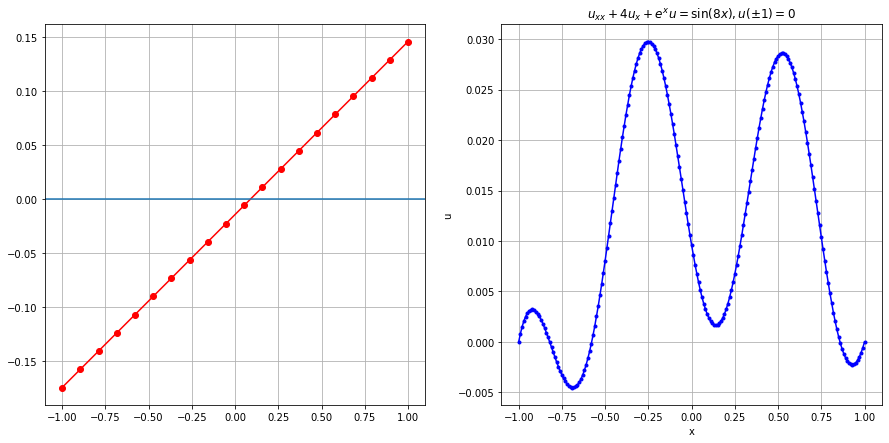

In [54]:
if __name__ == '__main__':
    shoot_bisection()

<font size = 4 color = black face = "Times New Roman">
The result is shown in the picture at right.

### Problem 4

<font size = 4 color = black face = "Times New Roman">
This problem deals with the the first few energy levels and the associated wave functions for a potential of the form
    $$
    V = \frac{1}{2}k_1x^2+\frac{1}{2}k_2{x^4}
    $$
I set $k_1=1$, $k_2=0.1$. $\hbar=m=1$ in this problem and mainly apply sample script(matching method in this problem but with modifications due to this problem.

In [55]:
def potential(x,k_1=1,k_2=0.1): # Set the petential
    return 0.5*k_1*x**2+0.5*k_2*x**4

In [56]:
def generate_x_grid(n=0,dx=0.1,k_1=1):
    # n=0,1,2, : energy levels
    x0 = 1/np.sqrt(k_1)
    xmax = 10 * x0
    x = np.arange(-xmax, xmax+dx, dx)  
    return x

In [57]:
def initialize_psi(N):
    # intialize wave function
    psi = np.zeros(N)
    psi[1] = 1e-3  # integration from left to right
    psi[N-2] = 1e-3 # integration from right to left
    
    return psi

In [58]:
def oscillator_matching(n=0,E=0, k_1=1,k_2 =0.1,dx=0.1, dE=0.1):
    # energy level n=0,1,2...
    # initial guess of energy E, increment dE
    # wavefunction with define parity
    # half width of square well L
    # step size of x grid dx
    # cutoff parameter b, we need to adjust it to handle other potentials
    
    x = generate_x_grid(n,dx,k_1);
    N = len(x)

    psi = initialize_psi(N);    

   
    tol = 0.5e-6   # stopping criterion, if wavefunction converges

    # initialize last_diverge which keeps tracks of the direction of the divergin trned
    last_diverge = 0 # we don't kow this direction a priori

    dx2 = dx * dx
    
    matching_index = np.argmin(potential(x,k_1,k_2))
    # print(matching_index)
    
    while True:
        # integration from left to right
        for i in range(2,matching_index+1):
            psi[i] = 2*psi[i-1] - psi[i-2] - 2 * (E - potential(x[i-1],k_1,k_2)) * psi[i-1] * dx2
                 
        psi_left = psi[matching_index]   
        
        for i in range(N-3,matching_index-1,-1):
            psi[i] = 2*psi[i+1] - psi[i+2] - 2 * (E - potential(x[i+1],k_1,k_2)) * psi[i+1] * dx2
            
               
        if abs(dE) < tol:
            break        
                    
        psi_right = psi[matching_index] 
        psi[matching_index::] = psi[matching_index::] * psi_left / psi_right # wave function continues
        # three-point forward difference formula
        deri_psi_right = -3*psi[matching_index] + 4*psi[matching_index+1] - psi[matching_index+2] 
        # three-point backward difference formula
        deri_psi_left = 3*psi[matching_index] - 4*psi[matching_index-1] + psi[matching_index-2]

        dif = abs(deri_psi_right) - abs(deri_psi_left)
        if  dif * last_diverge < 0:
            dE = -dE / 2
        last_diverge = np.sign(dif)
        E = E + dE
        
    psi = psi / np.sqrt(np.sum(psi * psi)) # normalisation
    
    return E,x,psi

In [59]:
def oscillator_matching_app(k_1=1,k_2=0.1,dx=0.1):
    
    # plot the lowest four states
    
    # initialize plot
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$')
    plt.grid('on')
    plt.axhline()
    
    # initialize first guess
    E_init = 0.1
    DeltaE = 0.05
    
    for n in range(0,5):
        
        E,x,psi = oscillator_matching(n,E_init,k_1,k_2,dx)
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi)))
                
        E_init = E + DeltaE
    
    plt.legend()
    plt.title('Oscillator $k_1 = {:}, k_2={}$'.format(k_1,k_2))

E = 0.533, normalizatoin = 1.00000
E = 1.653, normalizatoin = 1.00000
E = 2.874, normalizatoin = 1.00000
E = 4.176, normalizatoin = 1.00000
E = 5.549, normalizatoin = 1.00000


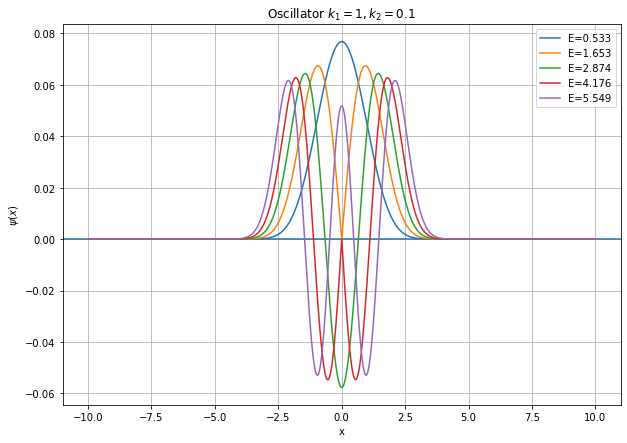

In [60]:
if __name__ == '__main__':
    oscillator_matching_app(k_1=1,k_2=0.1,dx=0.01)

<font size = 4 color = black face = "Times New Roman">
The first few energy levels and the associated wave functions for a potential are shown in the figure above.